<a href="https://colab.research.google.com/github/ashikkl/neural-net-excel-2023/blob/main/NeuralNet2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Add Dataframes

In [3]:
import pandas as pd

test_df = pd.read_csv('/content/test.csv')
train_df = pd.read_csv('/content/train.csv')
pd.set_option('display.precision', 2)

print(test_df.head())
print(train_df.head())


   row_id        date  state      store      product
0   22297  23-05-2018  Delhi  ExcelMart      Mec Hat
1   22298  23-05-2018  Delhi  ExcelMart  Mec Sticker
2   22299  23-05-2018  Delhi   MecStore      Mec Mug
3   22300  23-05-2018  Delhi   MecStore      Mec Hat
4   22301  23-05-2018  Delhi   MecStore  Mec Sticker
   row_id        date   state      store      product  num_sold
0     0.0  01-01-2015  Kerala  ExcelMart      Mec Mug     329.0
1     1.0  01-01-2015  Kerala  ExcelMart      Mec Hat     520.0
2     2.0  01-01-2015  Kerala  ExcelMart  Mec Sticker     146.0
3     3.0  01-01-2015  Kerala   MecStore      Mec Mug     572.0
4     4.0  01-01-2015  Kerala   MecStore      Mec Hat     911.0


In [4]:
train_df.describe()


,row_id,num_sold
count,22297.00,22297.00
mean,11148.00,385.81
std,6436.73,266.42
min,0.00,70.00
25%,5574.00,188.00
50%,11148.00,312.00
75%,16722.00,506.00
max,22296.00,2807.00


In [5]:
print(test_df.dtypes)
print(train_df.dtypes)


row_id      int64
date       object
state      object
store      object
product    object
dtype: object
row_id      float64
date         object
state        object
store        object
product      object
num_sold    float64
dtype: object


In [6]:
print(train_df["row_id"].isnull().sum())
print(train_df["num_sold"].isnull().sum())

2293
2293


##Visualization


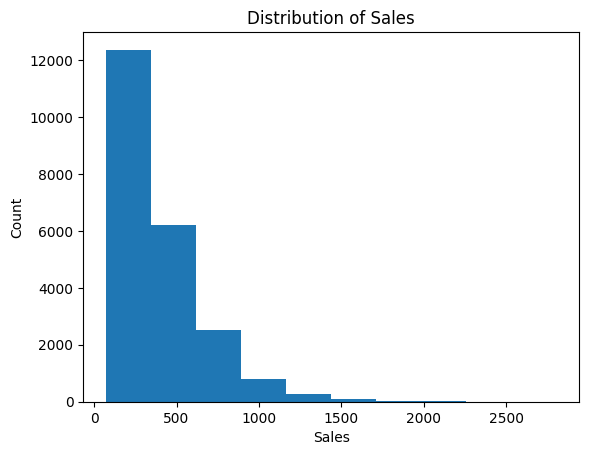

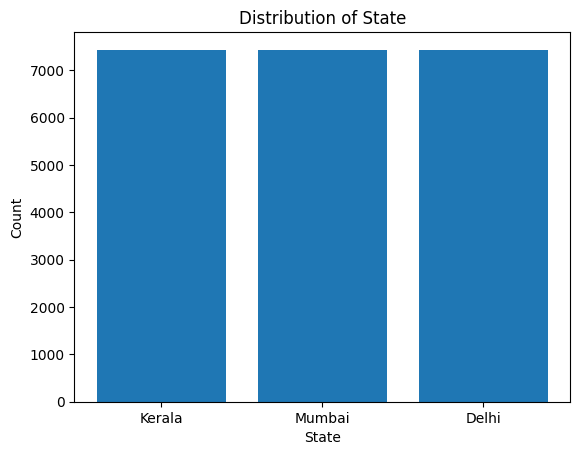

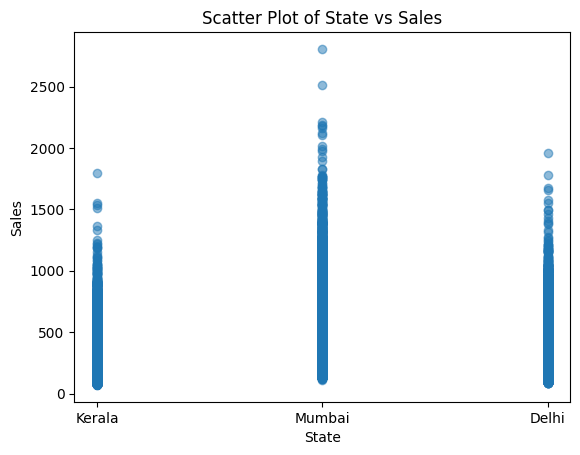

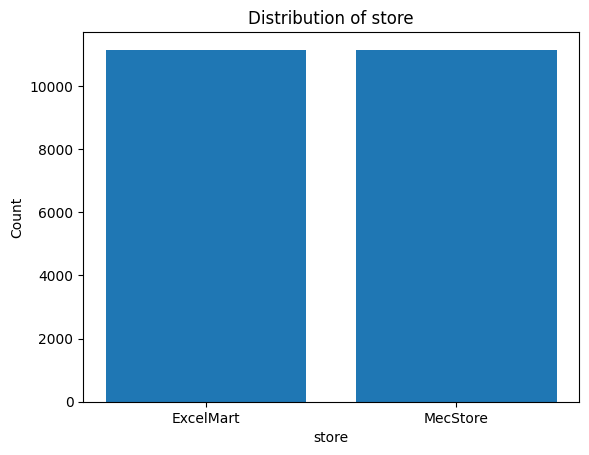

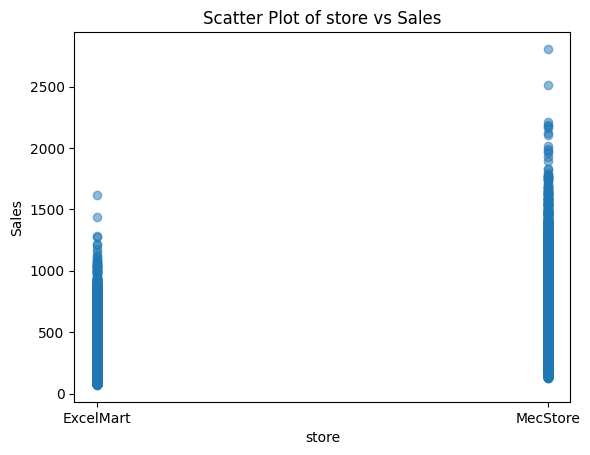

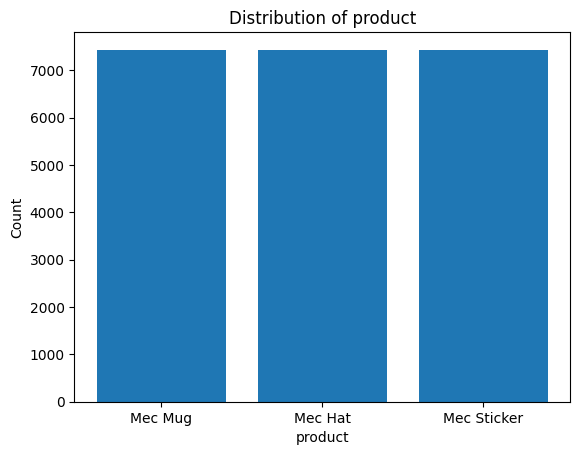

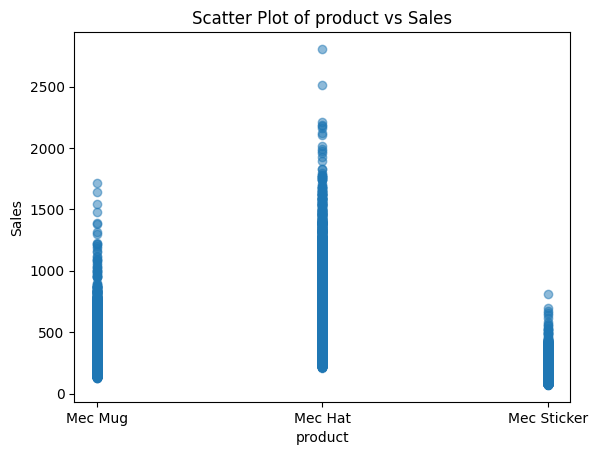

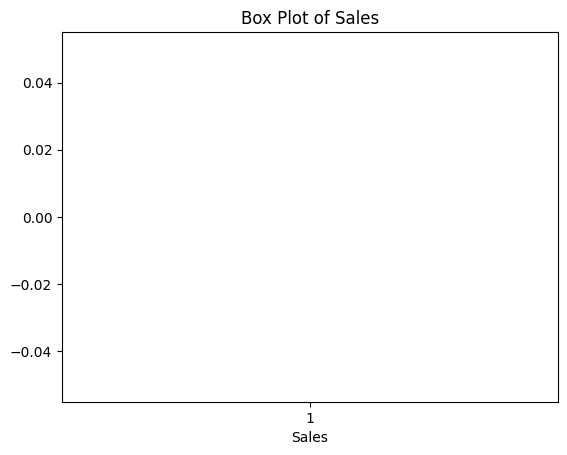

In [7]:
import matplotlib.pyplot as plt

plt.hist(train_df['num_sold'], bins=10)
plt.xlabel('Sales')
plt.ylabel('Count')
plt.title('Distribution of Sales')
plt.show()

plt.bar(train_df['state'].value_counts().index.astype(str), train_df['state'].value_counts().values)
plt.xlabel('State')
plt.ylabel('Count')
plt.title('Distribution of State')
plt.show()

plt.scatter(train_df['state'].astype(str), train_df['num_sold'], alpha=0.5)
plt.xlabel('State')
plt.ylabel('Sales')
plt.title('Scatter Plot of State vs Sales')
plt.show()

plt.bar(train_df['store'].value_counts().index.astype(str), train_df['store'].value_counts().values)
plt.xlabel('store')
plt.ylabel('Count')
plt.title('Distribution of store')
plt.show()

plt.scatter(train_df['store'].astype(str), train_df['num_sold'], alpha=0.5)
plt.xlabel('store')
plt.ylabel('Sales')
plt.title('Scatter Plot of store vs Sales')
plt.show()

plt.bar(train_df['product'].value_counts().index.astype(str), train_df['product'].value_counts().values)
plt.xlabel('product')
plt.ylabel('Count')
plt.title('Distribution of product')
plt.show()

plt.scatter(train_df['product'].astype(str), train_df['num_sold'], alpha=0.5)
plt.xlabel('product')
plt.ylabel('Sales')
plt.title('Scatter Plot of product vs Sales')
plt.show()

plt.boxplot(train_df['num_sold'])
plt.xlabel('Sales')
plt.title('Box Plot of Sales')
plt.show()

##Data normalization


In [8]:

def replace_str_with_int(df, column_name, replacement_dict):
  df[column_name] = df[column_name].replace(replacement_dict)
  return df

states = {"Kerala": 1, "Mumbai": 2, "Delhi": 3}
train_df = replace_str_with_int(train_df, "state", states)

products = {"Mec Mug": 1, "Mec Hat": 2, "Mec Sticker": 3}
train_df = replace_str_with_int(train_df, "product", products)

stores = {"ExcelMart": 1, "MecStore": 2}
train_df = replace_str_with_int(train_df, "store", stores)

print(train_df.head())


   row_id        date  state  store  product  num_sold
0     0.0  01-01-2015    1.0    1.0      1.0     329.0
1     1.0  01-01-2015    1.0    1.0      2.0     520.0
2     2.0  01-01-2015    1.0    1.0      3.0     146.0
3     3.0  01-01-2015    1.0    2.0      1.0     572.0
4     4.0  01-01-2015    1.0    2.0      2.0     911.0


In [9]:
states = {"Kerala": 1, "Mumbai": 2, "Delhi": 3}
test_df = replace_str_with_int(test_df, "state", states)

products = {"Mec Mug": 1, "Mec Hat": 2, "Mec Sticker": 3}
test_df = replace_str_with_int(test_df, "product", products)

stores = {"ExcelMart": 1, "MecStore": 2}
test_df = replace_str_with_int(test_df, "store", stores)

In [10]:
train_df['product'].astype(str).value_counts()


1.0    7433
2.0    7432
3.0    7432
nan    2293
Name: product, dtype: int64

In [11]:
train_df= train_df.dropna()

In [12]:
print(f"Number of rows after deletion: {len(train_df)}")

Number of rows after deletion: 22297


In [13]:
train_df["row_id"]=train_df["row_id"].astype("int")
train_df["num_sold"]= train_df["num_sold"].astype("int")
train_df["state"]= train_df["state"].astype("int")
train_df["product"]= train_df["product"].astype("int")
train_df["store"]= train_df["store"].astype("int")

<ipython-input-13-8eff080e962d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df["row_id"]=train_df["row_id"].astype("int")
<ipython-input-13-8eff080e962d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df["num_sold"]= train_df["num_sold"].astype("int")
<ipython-input-13-8eff080e962d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyda

In [14]:
test_df["row_id"]=test_df["row_id"].astype("int")
test_df["state"]= test_df["state"].astype("int")
test_df["product"]= test_df["product"].astype("int")
test_df["store"]= test_df["store"].astype("int")

##Adding date feature


In [15]:
train_df['date'] = pd.to_datetime(train_df['date'],dayfirst=True)
train_df['year'] = train_df['date'].dt.year
train_df['month'] = train_df['date'].dt.month
train_df['day'] = train_df['date'].dt.day

In [16]:
test_df['date'] = pd.to_datetime(test_df['date'],dayfirst=True)
test_df['year'] = test_df['date'].dt.year
test_df['month'] = test_df['date'].dt.month
test_df['day'] = test_df['date'].dt.day


In [17]:
print(train_df["month"].value_counts())
print(train_df.head())

1     2232
3     2232
4     2160
5     2083
2     2034
7     1674
8     1674
10    1674
12    1674
6     1620
9     1620
11    1620
Name: month, dtype: int64
   row_id       date  state  store  product  num_sold  year  month  day
0       0 2015-01-01      1      1        1       329  2015      1    1
1       1 2015-01-01      1      1        2       520  2015      1    1
2       2 2015-01-01      1      1        3       146  2015      1    1
3       3 2015-01-01      1      2        1       572  2015      1    1
4       4 2015-01-01      1      2        2       911  2015      1    1


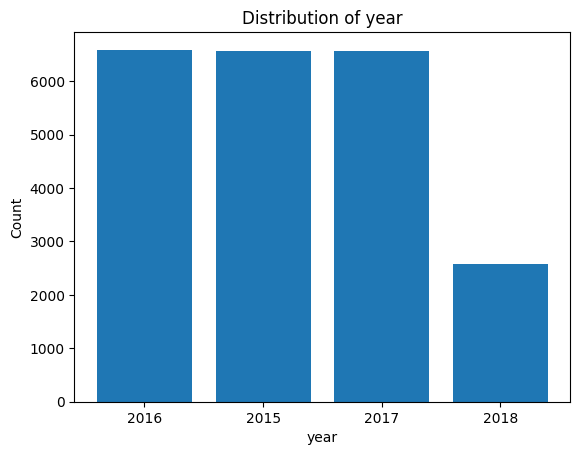

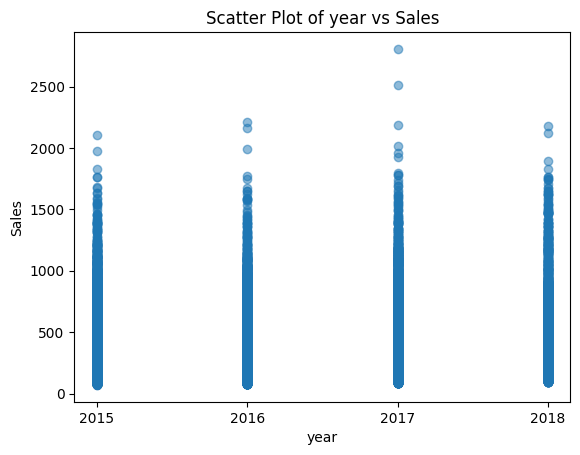

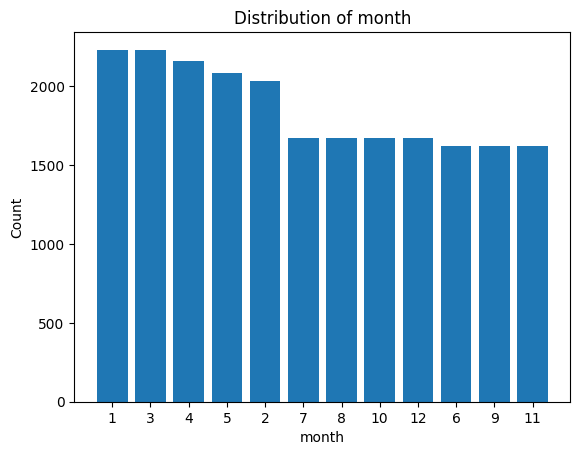

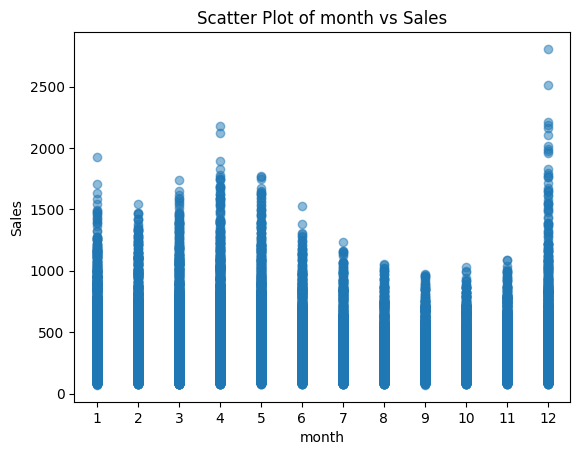

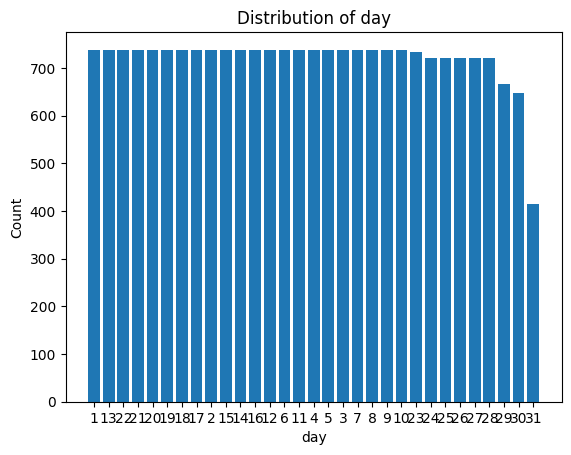

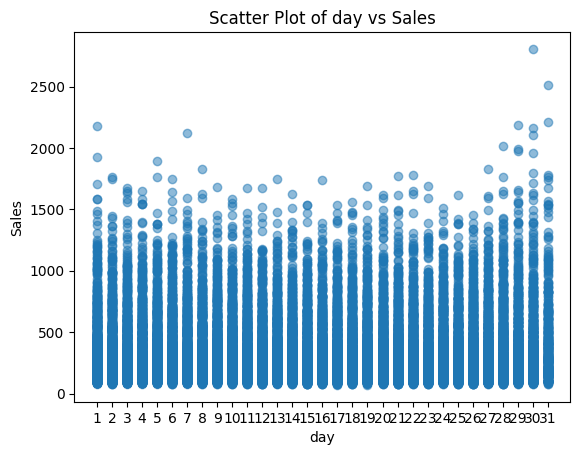

In [18]:
plt.bar(train_df['year'].value_counts().index.astype(str), train_df['year'].value_counts().values)
plt.xlabel('year')
plt.ylabel('Count')
plt.title('Distribution of year')
plt.show()

plt.scatter(train_df['year'].astype(str), train_df['num_sold'], alpha=0.5)
plt.xlabel('year')
plt.ylabel('Sales')
plt.title('Scatter Plot of year vs Sales')
plt.show()

plt.bar(train_df['month'].value_counts().index.astype(str), train_df['month'].value_counts().values)
plt.xlabel('month')
plt.ylabel('Count')
plt.title('Distribution of month')
plt.show()

plt.scatter(train_df['month'].astype(str), train_df['num_sold'], alpha=0.5)
plt.xlabel('month')
plt.ylabel('Sales')
plt.title('Scatter Plot of month vs Sales')
plt.show()

plt.bar(train_df['day'].value_counts().index.astype(str), train_df['day'].value_counts().values)
plt.xlabel('day')
plt.ylabel('Count')
plt.title('Distribution of day')
plt.show()

plt.scatter(train_df['day'].astype(str), train_df['num_sold'], alpha=0.5)
plt.xlabel('day')
plt.ylabel('Sales')
plt.title('Scatter Plot of day vs Sales')
plt.show()


##Training and testing



In [19]:
from sklearn.model_selection import train_test_split

x = train_df[['state', 'store', 'product', 'year', 'month', 'day']]
y = train_df['num_sold']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)


In [20]:
!pip install catboost
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import BayesianRidge
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.linear_model import RANSACRegressor
from sklearn.linear_model import TheilSenRegressor
from sklearn.linear_model import HuberRegressor
from sklearn.neural_network import MLPRegressor
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

from sklearn.metrics import mean_squared_error, mean_absolute_error, median_absolute_error, r2_score
import math

models = [
    LinearRegression(),
    ElasticNet(alpha=0.32, l1_ratio=0.5),
    Lasso(alpha=0.32),
    Ridge(alpha=0.32),
    BayesianRidge(),
    HuberRegressor(),
    XGBRegressor(),
    LGBMRegressor(),
    CatBoostRegressor(),
    DecisionTreeRegressor(),
    RandomForestRegressor(),
    ExtraTreesRegressor(n_estimators=300),
    RANSACRegressor(random_state=0),
    TheilSenRegressor(random_state=0),
    SVR(),
    AdaBoostRegressor(),
    KNeighborsRegressor(n_neighbors=5, metric='euclidean'),
    GradientBoostingRegressor(n_estimators=500, min_samples_leaf=25, random_state=42),
    MLPRegressor(random_state=1, max_iter=500)

]

for model in models:
    model.fit(x_train[['state', 'store', 'product', 'year', 'month', 'day']], y_train)
    y_pred = model.predict(x_test[['state', 'store', 'product', 'year', 'month', 'day']])
    mse = mean_squared_error(y_test, y_pred)
    rmse =  mean_squared_error(y_test, y_pred, squared=False)
    mae = mean_absolute_error(y_test, y_pred)
    medae = median_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"Model: {model.__class__.__name__}")
    print(f"MSE: {mse}")
    print(f"RMSE: {rmse}")
    print(f"MAE: {mae}")
    print(f"MedAE: {medae}")
    print(f"R2: {r2}")
    print("-"*20)


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.5/98.5 MB 8.4 MB/s eta 0:00:00
Model: LinearRegression
MSE: 54765.24990388949
RMSE: 234.01976391725867
MAE: 173.4120035249458
MedAE: 145.14936733419017
R2: 0.24071999518392784
--------------------
Model: ElasticNet
MSE: 56771.72402345539
RMSE: 238.26817669058408
MAE: 176.97220490691817
MedAE: 150.27645897059847
R2: 0.2129017038068054
--------------------
Model: Lasso
MSE: 54766.88247411258
RMSE: 234.02325199456695
MAE: 173.4206352742817
MedAE: 145.0827882007179
R2: 0.2406973607957158
--------------------
Model: Ridge
MSE: 54765.2773542497
RMSE: 234.01982256691355
MAE: 173.41204452402278
MedAE: 145.14958284832755
R2: 0.24071961460482572
--------------------
Model: BayesianRidge
MSE: 54765.79841290206
RMSE: 234.02093584314645
MAE: 173.41279291740798
MedAE: 145.19812617007847
R2: 0.240712390508948
--------------------


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Model: HuberRegressor
MSE: 59690.61795175241
RMSE: 244.31663461940616
MAE: 164.66805354474573
MedAE: 117.22229869002987
R2: 0.1724333812879747
--------------------
Model: XGBRegressor
MSE: 2380.2546764268077
RMSE: 48.78785377967356
MAE: 31.050540749018147
MedAE: 19.295120239257812
R2: 0.9669995154709872
--------------------
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000701 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 61
[LightGBM] [Info] Number of data points in the train set: 15607, number of used features: 6
[LightGBM] [Info] Start training from score 384.792080
Model: LGBMRegressor
MSE: 3306.4847974294844
RMSE: 57.50204168053065
MAE: 37.958866022865095
MedAE: 24.251383126061683
R2: 0.9541580144832275
--------------------
Learning rate set to 0.063201
0:	learn: 251.0603370	total: 49.8ms	remaining: 49.7s
1:	learn: 237.6633427	t

In [21]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR',LinearRegression())])))
pipelines.append(('ScaledLASSO', Pipeline([('Scaler', StandardScaler()),('LASSO', Lasso())])))
pipelines.append(('ScaledEN', Pipeline([('Scaler', StandardScaler()),('EN', ElasticNet())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsRegressor())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART', DecisionTreeRegressor())])))
pipelines.append(('ScaledGBM', Pipeline([('Scaler', StandardScaler()),('GBM', GradientBoostingRegressor())])))
pipelines.append(('ScaledET', Pipeline([('Scaler', StandardScaler()),('ET', ExtraTreesRegressor())])))
pipelines.append(('ScaledXGB', Pipeline([('Scaler', StandardScaler()),('XGB', XGBRegressor())])))

results = []
names = []
for name, model in pipelines:
    kfold = KFold(n_splits=10, random_state=21,shuffle=True)
    cv_results = cross_val_score(model, x_train, y_train, cv=kfold, scoring='neg_mean_squared_error')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

ScaledLR: -52820.756599 (3633.721377)
ScaledLASSO: -52820.113341 (3653.930544)
ScaledEN: -54789.757211 (3981.060740)
ScaledKNN: -5948.299949 (770.038973)
ScaledCART: -6239.240047 (254.205962)
ScaledGBM: -6237.725582 (713.812331)
ScaledET: -3534.231591 (296.368602)
ScaledXGB: -2252.736519 (139.943699)


In [22]:
from sklearn.model_selection import GridSearchCV
import numpy as np

scaler = StandardScaler().fit(x_train)
rescaledX = scaler.transform(x_train)
param_grid = dict(n_estimators=np.array([50,100,200,300]))
model = ExtraTreesRegressor(random_state=21)
kfold = KFold(n_splits=10, random_state=21, shuffle=True)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=kfold)
grid_result = grid.fit(rescaledX, y_train)

means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

-3545.907164 (290.711549) with: {'n_estimators': 50}
-3517.106554 (286.927524) with: {'n_estimators': 100}
-3510.085056 (291.321645) with: {'n_estimators': 200}
-3505.624221 (292.511051) with: {'n_estimators': 300}
Best: -3505.624221 using {'n_estimators': 300}


In [23]:
pipeline = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('model', XGBRegressor())
])

param_grid = {
    'model__n_estimators': [50, 100, 200, 300, 400, 500, 600, 700],
    'model__learning_rate': [0.01, 0.1, 0.2, 0.3]
}

kfold = KFold(n_splits=10, shuffle=True)
grid_search = GridSearchCV(pipeline, param_grid, scoring='neg_mean_squared_error', cv=kfold)
grid_search.fit(x_train, y_train)

print("Best score:", grid_search.best_score_)
print("Best parameters:", grid_search.best_params_)

y_pred = grid_search.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("RMSE:", rmse)
print("R2:", r2)

Best score: -1577.147129391893
Best parameters: {'model__learning_rate': 0.3, 'model__n_estimators': 700}
MSE: 1588.7996016379852
RMSE: 39.859749141684084
R2: 0.9779724593368871


In [24]:
import pandas as pd
diff_df = pd.DataFrame({'y_test': y_test, 'y_pred': y_pred, 'diff': y_pred-y_test})
print(diff_df.head())
print(diff_df.describe())

       y_test   y_pred   diff
2152     1093  1144.72  51.72
19478     100    77.48 -22.52
5570      156   137.09 -18.91
278       171   129.21 -41.79
7656      313   282.52 -30.48
        y_test   y_pred     diff
count  6690.00  6690.00  6690.00
mean    388.19   388.26     0.07
std     268.59   265.37    39.86
min      73.00    44.22  -495.65
25%     188.00   188.42   -17.15
50%     314.00   315.29     0.24
75%     510.00   517.78    18.32
max    2807.00  2343.39   249.42


##Output

In [25]:
test_df.head()

,row_id,date,state,store,product,year,month,day
0,22297,2018-05-23,3,1,2,2018,5,23
1,22298,2018-05-23,3,1,3,2018,5,23
2,22299,2018-05-23,3,2,1,2018,5,23
3,22300,2018-05-23,3,2,2,2018,5,23
4,22301,2018-05-23,3,2,3,2018,5,23


In [26]:
best_model= XGBRegressor(learning_rate=.3,n_estimators=700)
best_model.fit(x_train[['state', 'store', 'product', 'year', 'month', 'day']], y_train)

test = test_df[['state', 'store', 'product', 'year', 'month', 'day']]
out= best_model.predict(test)


In [27]:
out_df = pd.DataFrame({'row_id': test_df['row_id'], 'num_sold': out.astype("int")})
out_df.set_index('row_id', inplace=False)
print(out_df)
out_df.to_csv("submission.csv", index=False)

      row_id  num_sold
0      22297       519
1      22298       151
2      22299       357
3      22300       973
4      22301       281
...      ...       ...
3995   26293      1303
3996   26294       282
3997   26295      1120
3998   26296      1989
3999   26297       528

[4000 rows x 2 columns]
